### Context
This Project is designed to evaluate ability to read and write file formats of common types used in Data Science, and to manipulate complex data into different representations. The tasks are indicative of Data Pre-processing workloads which are common to all Data Science projects

### Background 

Having given a collection of data from a company wishing to process its customer records for business purposes (acw_user_data.csv). The number of records provided is significant, and therefore it is expected that solutions are robust to varying types of data, and varying values, offering a programmatic solution.

# TASK 1 -  DATA PROCESSING


In [73]:
# Import libraries 
import csv 
import json
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### QUESTION 1

 Read in the provided ACW Data using the CSV library.

In [74]:
fp = "acw_user_data.csv"  #filepath
with open (fp, mode="r") as ACW_file: 
    ACW = csv.DictReader(ACW_file)
    for row in ACW:
        print(row)

{'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
{'Address Street': '00 Wheeler wells', 'Address City': 'Chapmanton', 'Address Postcode': 'L2 7BT', 'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Credit Card Start Date': '08/12', 'Credit Card Expiry Date': '11/26', 'Credit Card Number': '4529436854129855', 'Cre

### QUESTION 2 

As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably:
a. Vehicle - consists of make, model, year, and type
b. Credit Card - consists of start date, end date, number, security code, and IBAN.
c. Address - consists of the main address, city, and postcode.
For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above.
Note: Ensure that the values read in are appropriately cast to their respective types.

In [75]:
"""Categorising the file into a rich file by putting similar attribute to a common attribute; this is achieved by 
 UPDATING the newly created structured dictionary """


def data_row_info(row):  #The function that takes in the Non-structured `read data for structuring 
    
    ACW_Data = {} #Dictionary holding the structured data 
    
    #Categorising Address information and updating into the ACW_Data being the structured dictionary name 
    Address = {}
    Address["Add_Street"] = row['Address Street']  
    Address["Add_City"] = row['Address City']
    Address["Add_Postcode"] = row['Address Postcode']
    
    ACW_Data["Address"] = Address
    
    # Categorising Credit card information and updating into the ACW_Data being the structured dictionary name 
    
    credit_card_details = {}
    credit_card_details["Credit_Card_start"] = row['Credit Card Start Date']
    credit_card_details["Credit_Card_expiry"] = row['Credit Card Expiry Date']
    credit_card_details["Credit_Card_no"] = int(row['Credit Card Number'])
    credit_card_details["Cred_Card_cvv"] = int(row['Credit Card CVV'])
    credit_card_details["Bank_iban"] = row['Bank IBAN']

    ACW_Data["Credit_card"] = credit_card_details
    
    #categoring the Vehicle details and updating into the ACW_Data being the structured dictionary
    
    vehicle_details = {}

    vehicle_details["Vehicle_make"] = row['Vehicle Make']
    vehicle_details["Vehicle_model"] = row['Vehicle Model']
    vehicle_details["Vehicle_year"] = int(row['Vehicle Year'])
    vehicle_details["Vehicle_type"] = row['Vehicle Type']
   
    ACW_Data["Vehicle"] = vehicle_details

    #Updating the "Age(Years)" attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Age"] = int(row['Age (Years)'])
    
    #Updating the "Distance Commuted to Work (miles)" attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Distance_Commutted"] = float(row['Distance Commuted to Work (miles)'])
    
    #Updating the "Employer Company" into the ACW_Data being the structured data name 
    ACW_Data["Employer_Company"] = row['Employer Company']
    
    #Updating the "First Name" attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["First_name"] = row['First Name']
    
    #Updating the 'Last Name' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Last_name"] = row['Last Name']
    
    #Updating the 'Marital Status' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Marital_status"] = row['Marital Status']
    
    #Updating the 'Yearly Pension (GBP)' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Yearly_Pension"] = float(row['Yearly Pension (GBP)'])
    
    #Updating the 'Retired' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Retired"] = row['Retired'].lower().capitalize() == "True"
    
    #Updating the'Yearly Salary (GBP)' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Yearly_Salary"] = float(row['Yearly Salary (GBP)'])
    
    #Updating the 'Sex' attribute(column) into the ACW_Data being the structured dictionary
    ACW_Data["Sex"] = row["Sex"]
    
    #Updating the  'Dependants' attribute(column) into the ACW_DATA being the structured dictionary
    dependent = row['Dependants'] 
    if dependent == "" or dependent == " ":  
        ACW_Data["dependennt"] = 11  
    else:
        ACW_Data["dependennt"] = int(row["Dependants"])

    
    
    return ACW_Data
        
    

In [76]:

# Flat Data File Path fp 
fp = "acw_user_data.csv"  

# Defining function to load Flat Data file path, open to read and read file as a dictionary and return  Flat file 
def load_data(fp):  
    file = open(fp, mode ="r")  
    csv_reader = csv.DictReader(file) 
    return csv_reader  


# Callup function to laod the flat file path (fp) and assign to csv_read 
flat_file = load_data(fp)  

ACW_file = []  #ACW_file holds the rich file or structured file  
for row in flat_file:    
    rich_data = data_row_info(row) #Called up function that takes "row"(Unstructured Data) and returns "row_data"(structured or rich Data) 
    ACW_file.append(rich_data) #Append to the "ACW_file" holding the structured or rich Data 
ACW_file 

[{'Address': {'Add_Street': '70 Lydia isle',
   'Add_City': 'Lake Conor',
   'Add_Postcode': 'S71 7XZ'},
  'Credit_card': {'Credit_Card_start': '08/18',
   'Credit_Card_expiry': '11/27',
   'Credit_Card_no': 676373692463,
   'Cred_Card_cvv': 875,
   'Bank_iban': 'GB62PQKB71416034141571'},
  'Vehicle': {'Vehicle_make': 'Hyundai',
   'Vehicle_model': 'Bonneville',
   'Vehicle_year': 2009,
   'Vehicle_type': 'Pickup'},
  'Age': 89,
  'Distance_Commutted': 0.0,
  'Employer_Company': 'N/A',
  'First_name': 'Kieran',
  'Last_name': 'Wilson',
  'Marital_status': 'married or civil partner',
  'Yearly_Pension': 7257.0,
  'Retired': True,
  'Yearly_Salary': 72838.0,
  'Sex': 'Male',
  'dependennt': 3},
 {'Address': {'Add_Street': '00 Wheeler wells',
   'Add_City': 'Chapmanton',
   'Add_Postcode': 'L2 7BT'},
  'Credit_card': {'Credit_Card_start': '08/12',
   'Credit_Card_expiry': '11/26',
   'Credit_Card_no': 4529436854129855,
   'Cred_Card_cvv': 583,
   'Bank_iban': 'GB37UMCO54540228728019'},
  

### Question 3

Printing a list where error corrections in the dependents column had taken place 

In [77]:
problematic_row = [] #Problematic row correction list 
    
for line, dats in enumerate(ACW_file):  #Iterating over the list of dictionary: "ACW_file "
    dependent = dats["dependennt"]
    if dependent >= 11: #Recall, while turning Data structured, we have assigned a constant value of 11 to fillup problematic rows 
        problematic_row.append(line) #Appending the problematic row into problematic_row being the list to house the dictionary
        

print("Problematic rows for dependants:", problematic_row )   #Print Problematic row correction 

Problematic rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


### Question 4 

Write all records to a processed.json file in the JSON data format. This should be a list of dictionaries, where each index of the list is a dictionary representing a singular person.

In [78]:
import json

with open("processed.json", mode = "w") as processed_json_file:  #Write records to JSON data format 
    json.dump(ACW_file, processed_json_file, indent = 2)
    processed_json_file.close() 

### QUESTION 5 

You should create two additional file outputs, retired.json and employed.json, these should contain all retired customers (as indicated by the retired field in the CSV), and all employed customers respectively (as indicated by the employer field in the CSV) and be in the JSON data format.

#### File Output in  json containing the retired customers 

In [79]:
retired_customers_index= [] #Index list at which the there are retired customers 

for lin, line in enumerate(ACW_file): #Looping over the structured file 
    if line["Retired"]== True: 
        retired_customers_index.append(lin) #Appending the index at which there exist retired customers into its list: retired_customers_index
        

retiree = []       
for i in retired_customers_index: #iterating over the index at which there exist retired customers
    retiree.append(ACW_file[i])   #subset this index over the ACW file and append into the retiree list which is the required output for the Json file 



# Writing the retiree into the json file

with open(" retired.json", mode = "w") as retirees:
    retiree_json_file = json.dump(retiree, retirees, indent = 2)
    retirees.close()    

#### File Output in  json containing the employed 

In [80]:
employer_company_index = []   ##Index list of employer company 

for index, line in enumerate(ACW_file):   #Looping over the structured file 
    if line['Employer_Company'] != 'N/A':  
        employer_company_index.append(index)  #Appending the index at which there exist employer company 
employer_company = []      
for i in employer_company_index:  #iterating over the index at which there exist employer company i.e employed customers 
    employer_company.append(ACW_file[i]) #subset this index over the ACW file and append into the  employer_company list which is the required output for the Json file 
    

# Outputting in JSON containing the employed 
with open("employed.json", mode = "w") as employed_customer:
    json.dump(employer_company,employed_customer, indent = 2)
    employed_customer.close()
    

### QUESTION 6 

The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data,and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [110]:
def remove_card(file): #Function to access file and determine the difference in the credit card issue and expiry date and append to a list 
    remove_ccard = []
    for row in file:
    
        #The split function splits trings into list as separated by delimiter
        Expiry = row['Credit_card']['Credit_Card_expiry'].split('/') 
        Start= row['Credit_card']['Credit_Card_start'].split('/') 

        #formatted year into int and containing year as integer  
        y1= int(f"20{Expiry[1]}") 
        #Day set to first day by default
        d1 = 1 
        #cast month value of expiry date to int Index of Zero
        m1 = int(Expiry[0])

        #cast month value of start date to int 
        m = int(Start[0]) 
        #formatted year into int and containing year as integer  
        y= int(f"20{Start[1]}") 
        #Day set to first day by default
        d = 1 

        #Expiry date to DateObject
        expiry_date = datetime.date(y1, m1, d1) 

        #start date to DateObject
        start_date = datetime.date(y, m, d) 

        #Difference in days 
        Diff = expiry_date - start_date 

        #Deriving the number of years 
        Diff_years = Diff.days / 365 
        
        if  Diff_years > 10: #if year difference is greater than 10
            remove_ccard.append(row) 

    return (remove_ccard)

In [111]:
removed_file = remove_card(ACW_file) 

In [112]:
with open("remove_ccard.json", mode = "w") as remove_ccard: 
    json.dump(removed_file , remove_ccard, indent=3)
    remove_ccard.close()

### QUESTION 7 

You have been tasked with calculating some additional metrics which will be used for ranking customers. You should create a new data attribute for our customers called “Salary-Commute”. Reading in from processed.json:
a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute.

i. Note: If a person travels 1 or fewer commute miles, then their salary-commute would be just their salary.

b. Sort these records by that new metric, in ascending order.

c. Store the output file out as a JSON format, for a commute.json file.

#### Question 7A

Adding a new Data attrubute for customer (SALARY-COMMUTE)  which corresponds to the salary earn for mile(s) commuted

In [84]:
with open ("processed.json", mode = "r") as processed:
    processed_file = json.load(processed)
    
salary_commute = [] #Created New Data attribute for our customers

for lines in processed_file:
   
    if lines['Distance_Commutted'] <= 1:
        
        lines["Salary-Commute"] = lines['Yearly_Salary'] #Lines as a dictionary now updated with data attribute:"Salary-commute" based on the "if" condition 
    else:
        lines["Salary-Commute"] = lines['Yearly_Salary'] / lines['Distance_Commutted'] #Lines as a dictionary now updated with data attribute:"Salary-commute" based on the "else" condition 
        
    salary_commute.append(lines)
    

salary_commute   

[{'Address': {'Add_Street': '70 Lydia isle',
   'Add_City': 'Lake Conor',
   'Add_Postcode': 'S71 7XZ'},
  'Credit_card': {'Credit_Card_start': '08/18',
   'Credit_Card_expiry': '11/27',
   'Credit_Card_no': 676373692463,
   'Cred_Card_cvv': 875,
   'Bank_iban': 'GB62PQKB71416034141571'},
  'Vehicle': {'Vehicle_make': 'Hyundai',
   'Vehicle_model': 'Bonneville',
   'Vehicle_year': 2009,
   'Vehicle_type': 'Pickup'},
  'Age': 89,
  'Distance_Commutted': 0.0,
  'Employer_Company': 'N/A',
  'First_name': 'Kieran',
  'Last_name': 'Wilson',
  'Marital_status': 'married or civil partner',
  'Yearly_Pension': 7257.0,
  'Retired': True,
  'Yearly_Salary': 72838.0,
  'Sex': 'Male',
  'dependennt': 3,
  'Salary-Commute': 72838.0},
 {'Address': {'Add_Street': '00 Wheeler wells',
   'Add_City': 'Chapmanton',
   'Add_Postcode': 'L2 7BT'},
  'Credit_card': {'Credit_Card_start': '08/12',
   'Credit_Card_expiry': '11/26',
   'Credit_Card_no': 4529436854129855,
   'Cred_Card_cvv': 583,
   'Bank_iban': 

#### Question 7B

Sort these records by that new metric, in ascending order.

In [85]:
#Sorted records 
salary_commute.sort(key=lambda x:x["Salary-Commute"])

#### Question 7C

Store the output file out as a JSON format, for a commute.json file.

In [86]:
with open ("commute.json", mode = "w") as commute:
    json.dump(salary_commute, commute, indent = 2)
    commute.close()   

# TASK 2 - DATA VISUALISATION  

### QUESTION 1

Obtain the Data Series for Salary, and Age, and calculate the following:
    
a. Mean Salary

b. Median Age

In [87]:
# File Path 
fp = "acw_user_data.csv" 

In [88]:
# importing file into Pandas for analysis 
df = pd.read_csv(fp)
df.head() #Accessing the first five rows 


,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


#### QUESTION 1A

Determine Mean Salary

In [89]:
# Data series for Salary 
df['Yearly Salary (GBP)']

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [90]:
# Getting the Mean for Salary
df['Yearly Salary (GBP)'].mean()

57814.078

#### QUESTION 1B

Determine Median Age 

In [91]:
# Data series for Age in years 
df["Age (Years)"] 

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [92]:
# Getting the Median for Age 
df["Age (Years)"].median()  

54.0

### QUESTION 2 

Perform univariate plots of the following data attributes:
    
a. Age, calculating how many bins would be required for a bin_width of 5

b. Dependents, fixing data errors with seaborn itself

c. Age (of default bins), conditioned on Marital Status

#### QUESTION 2A
Perform Unvariate plot of Age, calculating how many bins would be required for a bin_width of 5.

In [93]:
Maximum_Age = df["Age (Years)"].max()
Maximum_Age

91

In [94]:
Minimum_Age = df["Age (Years)"].min()
Minimum_Age

18

In [95]:
difference  = Maximum_Age - Minimum_Age
difference

73

In [96]:
bin_width = 5
no_bins = difference // bin_width 
no_bins

14

Text(0.5, 1.0, 'Plot showing the Age count')

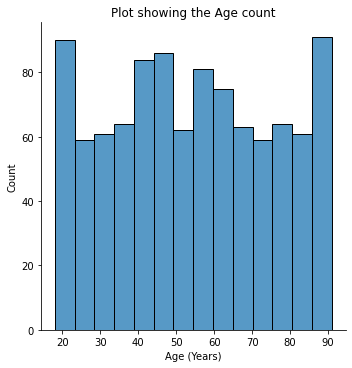

In [97]:
#Perform univariate plots on the Age Data Attribute 
Age_plt = sns.displot(data = df, x =df["Age (Years)"], bins = no_bins )
plt.title("Plot showing the Age count")

#### QUESTION 2B
Perform Unvariate plot on Dependents Data Attribut, fixing data errors with seaborn itself 

Text(0.5, 1.0, 'Plot showing the Dependants count')

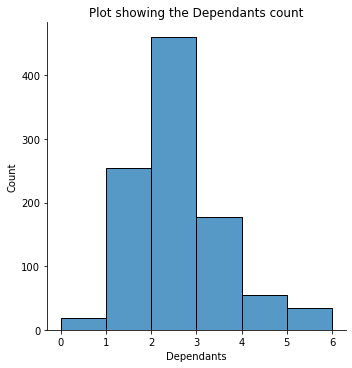

In [98]:
Dependent_plot = sns.displot(df["Dependants"].fillna(0), bins=[0, 1, 2, 3, 4, 5, 6])
plt.title("Plot showing the Dependants count")


In [99]:
"""Deduction from Above graph:It can be deduced from the graph above that customers  with two(2)numbers dependents counts 
are higher compared to those with 1number, 3numbers,4numbers and 5numbers dependants"""

'Deduction from Above graph:It can be deduced from the graph above that customers  with two(2)numbers dependents counts \nare higher compared to those with 1number, 3numbers,4numbers and 5numbers dependants'

#### QUESTION 2C

Perform Univariate plot on  Age (of default bins), conditioned on Marital Status

Text(0.5, 1.0, 'Age count with respect to the Marital Status')

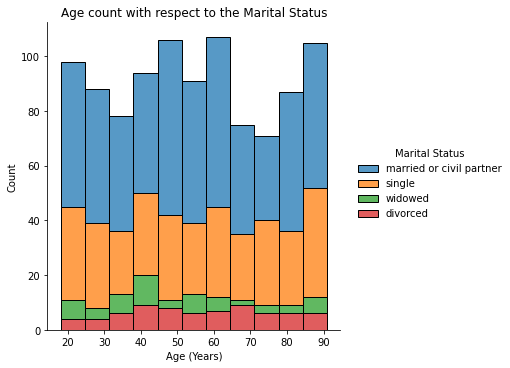

In [100]:
Age_Marital_Status = sns.displot(data = df, x = df["Age (Years)"], hue = df['Marital Status'], multiple = "stack" )
plt.title("Age count with respect to the Marital Status")


In [101]:
"""Deduction from Above graph: It can be deduced that for different age range, there tend to be
Married category saturated than every other category(Single, windowered, divorced)"""

'Deduction from Above graph: It can be deduced that for different age range, there tend to be\nMarried category saturated than every other category(Single, windowered, divorced)'

### QUESTION 3

Perform multivariate plots with the following data attributes:

a. Commuted distance against salary

b. Age against Salary

c. Age against Salary conditioned by Dependants

#### QUESTION 3A

Perform multivariate plot of Commuted distance against salary

Text(0.5, 1.0, 'Distance Commuted against Yearly Salary')

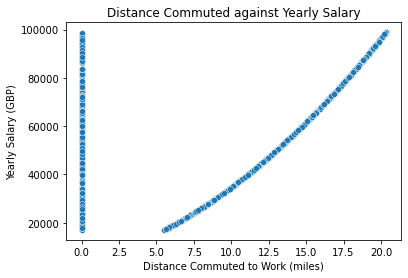

In [102]:
Dist_Sal = sns.scatterplot(data = df, x = 'Distance Commuted to Work (miles)', y = 'Yearly Salary (GBP)' )
plt.title("Distance Commuted against Yearly Salary")


In [103]:
"""Deduction from Above graph - It can be deduced that the farther the distance commuted to work, the higher the
Yealy salary as there tend to be a direct relatioship between these variables; 
however, the retired will fall in the category of those in the upward straight line category as they do not commute to work """

'Deduction from Above graph - It can be deduced that the farther the distance commuted to work, the higher the\nYealy salary as there tend to be a direct relatioship between these variables; \nhowever, the retired will fall in the category of those in the upward straight line category as they do not commute to work '

#### QUESTION 3B

Perform multivariate plot of Age against Salary

Text(0.5, 1.0, 'age in Years against Yearly Salary in GBP ')

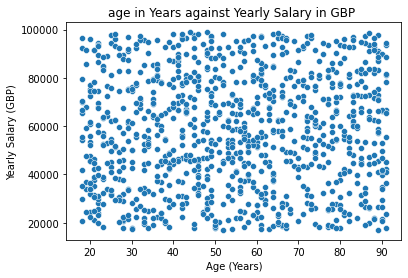

In [104]:
# Perform multivariate plots with Age against salary
age_salary = sns.scatterplot(data=df, x = "Age (Years)" , y = 'Yearly Salary (GBP)' )
plt.title("age in Years against Yearly Salary in GBP ")

#### QUESTION 3C 
Perform multivariate plots with Age against Salary conditioned by Dependants 

Text(0.5, 1.0, 'age in Years against Yearly Salary in GBP with respect to the Dependents')

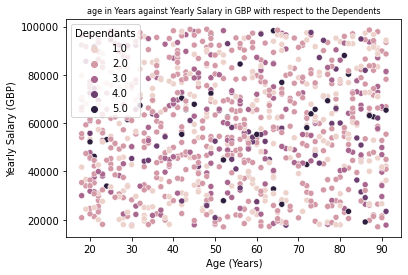

In [105]:
Age_Salary_Depend = sns.scatterplot(data=df, x = "Age (Years)" , y = 'Yearly Salary (GBP)', hue = "Dependants" )
plt.title("age in Years against Yearly Salary in GBP with respect to the Dependents", size = 8)

### QUESTION 4

Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

In [106]:
saved_plot = {}

saved_plot["Age_Salary_Depend.png"] = Age_Salary_Depend
saved_plot["Age_Marital_Status.png"] = Age_Marital_Status
saved_plot["Dependent_plt.png"] = Dependent_plot
saved_plot["Age_plot.png"] = Age_plt
saved_plot["age_salary.png"] = age_salary 
saved_plot["Dist_Sal.png"] = Dist_Sal


    

In [107]:

saved_plot
           

{'Age_Salary_Depend.png': <AxesSubplot:title={'center':'age in Years against Yearly Salary in GBP with respect to the Dependents'}, xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>,
 'Age_Marital_Status.png': <seaborn.axisgrid.FacetGrid at 0x1d8dc7aca90>,
 'Dependent_plt.png': <seaborn.axisgrid.FacetGrid at 0x1d8db105130>,
 'Age_plot.png': <seaborn.axisgrid.FacetGrid at 0x1d8db1312e0>,
 'age_salary.png': <AxesSubplot:title={'center':'age in Years against Yearly Salary in GBP '}, xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>,
 'Dist_Sal.png': <AxesSubplot:title={'center':'Distance Commuted against Yearly Salary'}, xlabel='Distance Commuted to Work (miles)', ylabel='Yearly Salary (GBP)'>}

In [109]:
for i, j in saved_plot.items():
    
    try: 
        j.savefig(i)
    except AttributeError:
        j.get_figure().savefig(i)
        